<a href="https://colab.research.google.com/github/21Ovi/Employee-Performance-Analysis/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import skew, kurtosis

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [10]:
data = pd.read_excel("/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Renaming Column name to more human readable names

In [13]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [16]:
# Dropping EmpNumber as it has no impact on dependent variables
data.drop('EmpNumber',axis=1, inplace=True)

In [17]:
data.columns= ['Age', 'Gender', 'Education Background', 'Marital Status',
                'Employees Department', 'Employees Job Role', 'Business Travel Frequency',
                'Distance From Home', 'Employee Education Level', 'Employee Environment Satisfaction',
                'Employee Hourly Rate', 'Employee Job Involvement', 'Employee Job Level',
                'Employee Job Satisfaction', 'Number of Companies Worked', 'Over Time',
                'Employee Last Salary Hike Percent', 'Employee Relationship Satisfaction',
                'Total Work Experience In Years', 'Training Times Last Year',
                'Employee Work Life Balance', 'Experience Years At This Company',
                'Experience Years In Current Role', 'Years Since Last Promotion',
                'Years With Curr Manager', 'Attrition', 'Performance Rating']

#### Describing statistical informantion about data

In [18]:
data.describe()

,Age,Distance From Home,Employee Education Level,Employee Environment Satisfaction,Employee Hourly Rate,Employee Job Involvement,Employee Job Level,Employee Job Satisfaction,Number of Companies Worked,Employee Last Salary Hike Percent,Employee Relationship Satisfaction,Total Work Experience In Years,Training Times Last Year,Employee Work Life Balance,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Performance Rating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


#### Getting information about the data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 1200 non-null   int64 
 1   Gender                              1200 non-null   object
 2   Education Background                1200 non-null   object
 3   Marital Status                      1200 non-null   object
 4   Employees Department                1200 non-null   object
 5   Employees Job Role                  1200 non-null   object
 6   Business Travel Frequency           1200 non-null   object
 7   Distance From Home                  1200 non-null   int64 
 8   Employee Education Level            1200 non-null   int64 
 9   Employee Environment Satisfaction   1200 non-null   int64 
 10  Employee Hourly Rate                1200 non-null   int64 
 11  Employee Job Involvement            1200 non-null   int6

## Checking for duplicate rows

In [21]:
data.duplicated().sum()

0

From info method we got idea about datatypes of features, so now filtering out `Numerical Data`

In [23]:
num_data = data[['Age','Distance From Home','Employee Hourly Rate','Number of Companies Worked','Employee Last Salary Hike Percent', 'Total Work Experience In Years',
              'Training Times Last Year','Experience Years At This Company','Experience Years In Current Role','Years Since Last Promotion',
              'Years With Curr Manager']]
num_data

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,32,10,55,1,12,10,2,10,7,0,8
1,47,14,42,2,12,20,2,7,7,1,7
2,40,5,48,5,21,20,2,18,13,1,12
3,41,10,73,3,15,23,2,21,6,12,6
4,60,16,84,8,14,10,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0,4
1196,37,10,80,3,17,4,2,1,0,0,0
1197,50,28,74,1,11,20,3,20,8,3,8
1198,34,9,46,1,14,9,3,8,7,7,7


## Checking Normal Distribution

The normal distribution describes a symmetrical plot of data around its mean value, where the width of the curve is defined by the standard deviation. It is visually depicted as the `bell curve`.

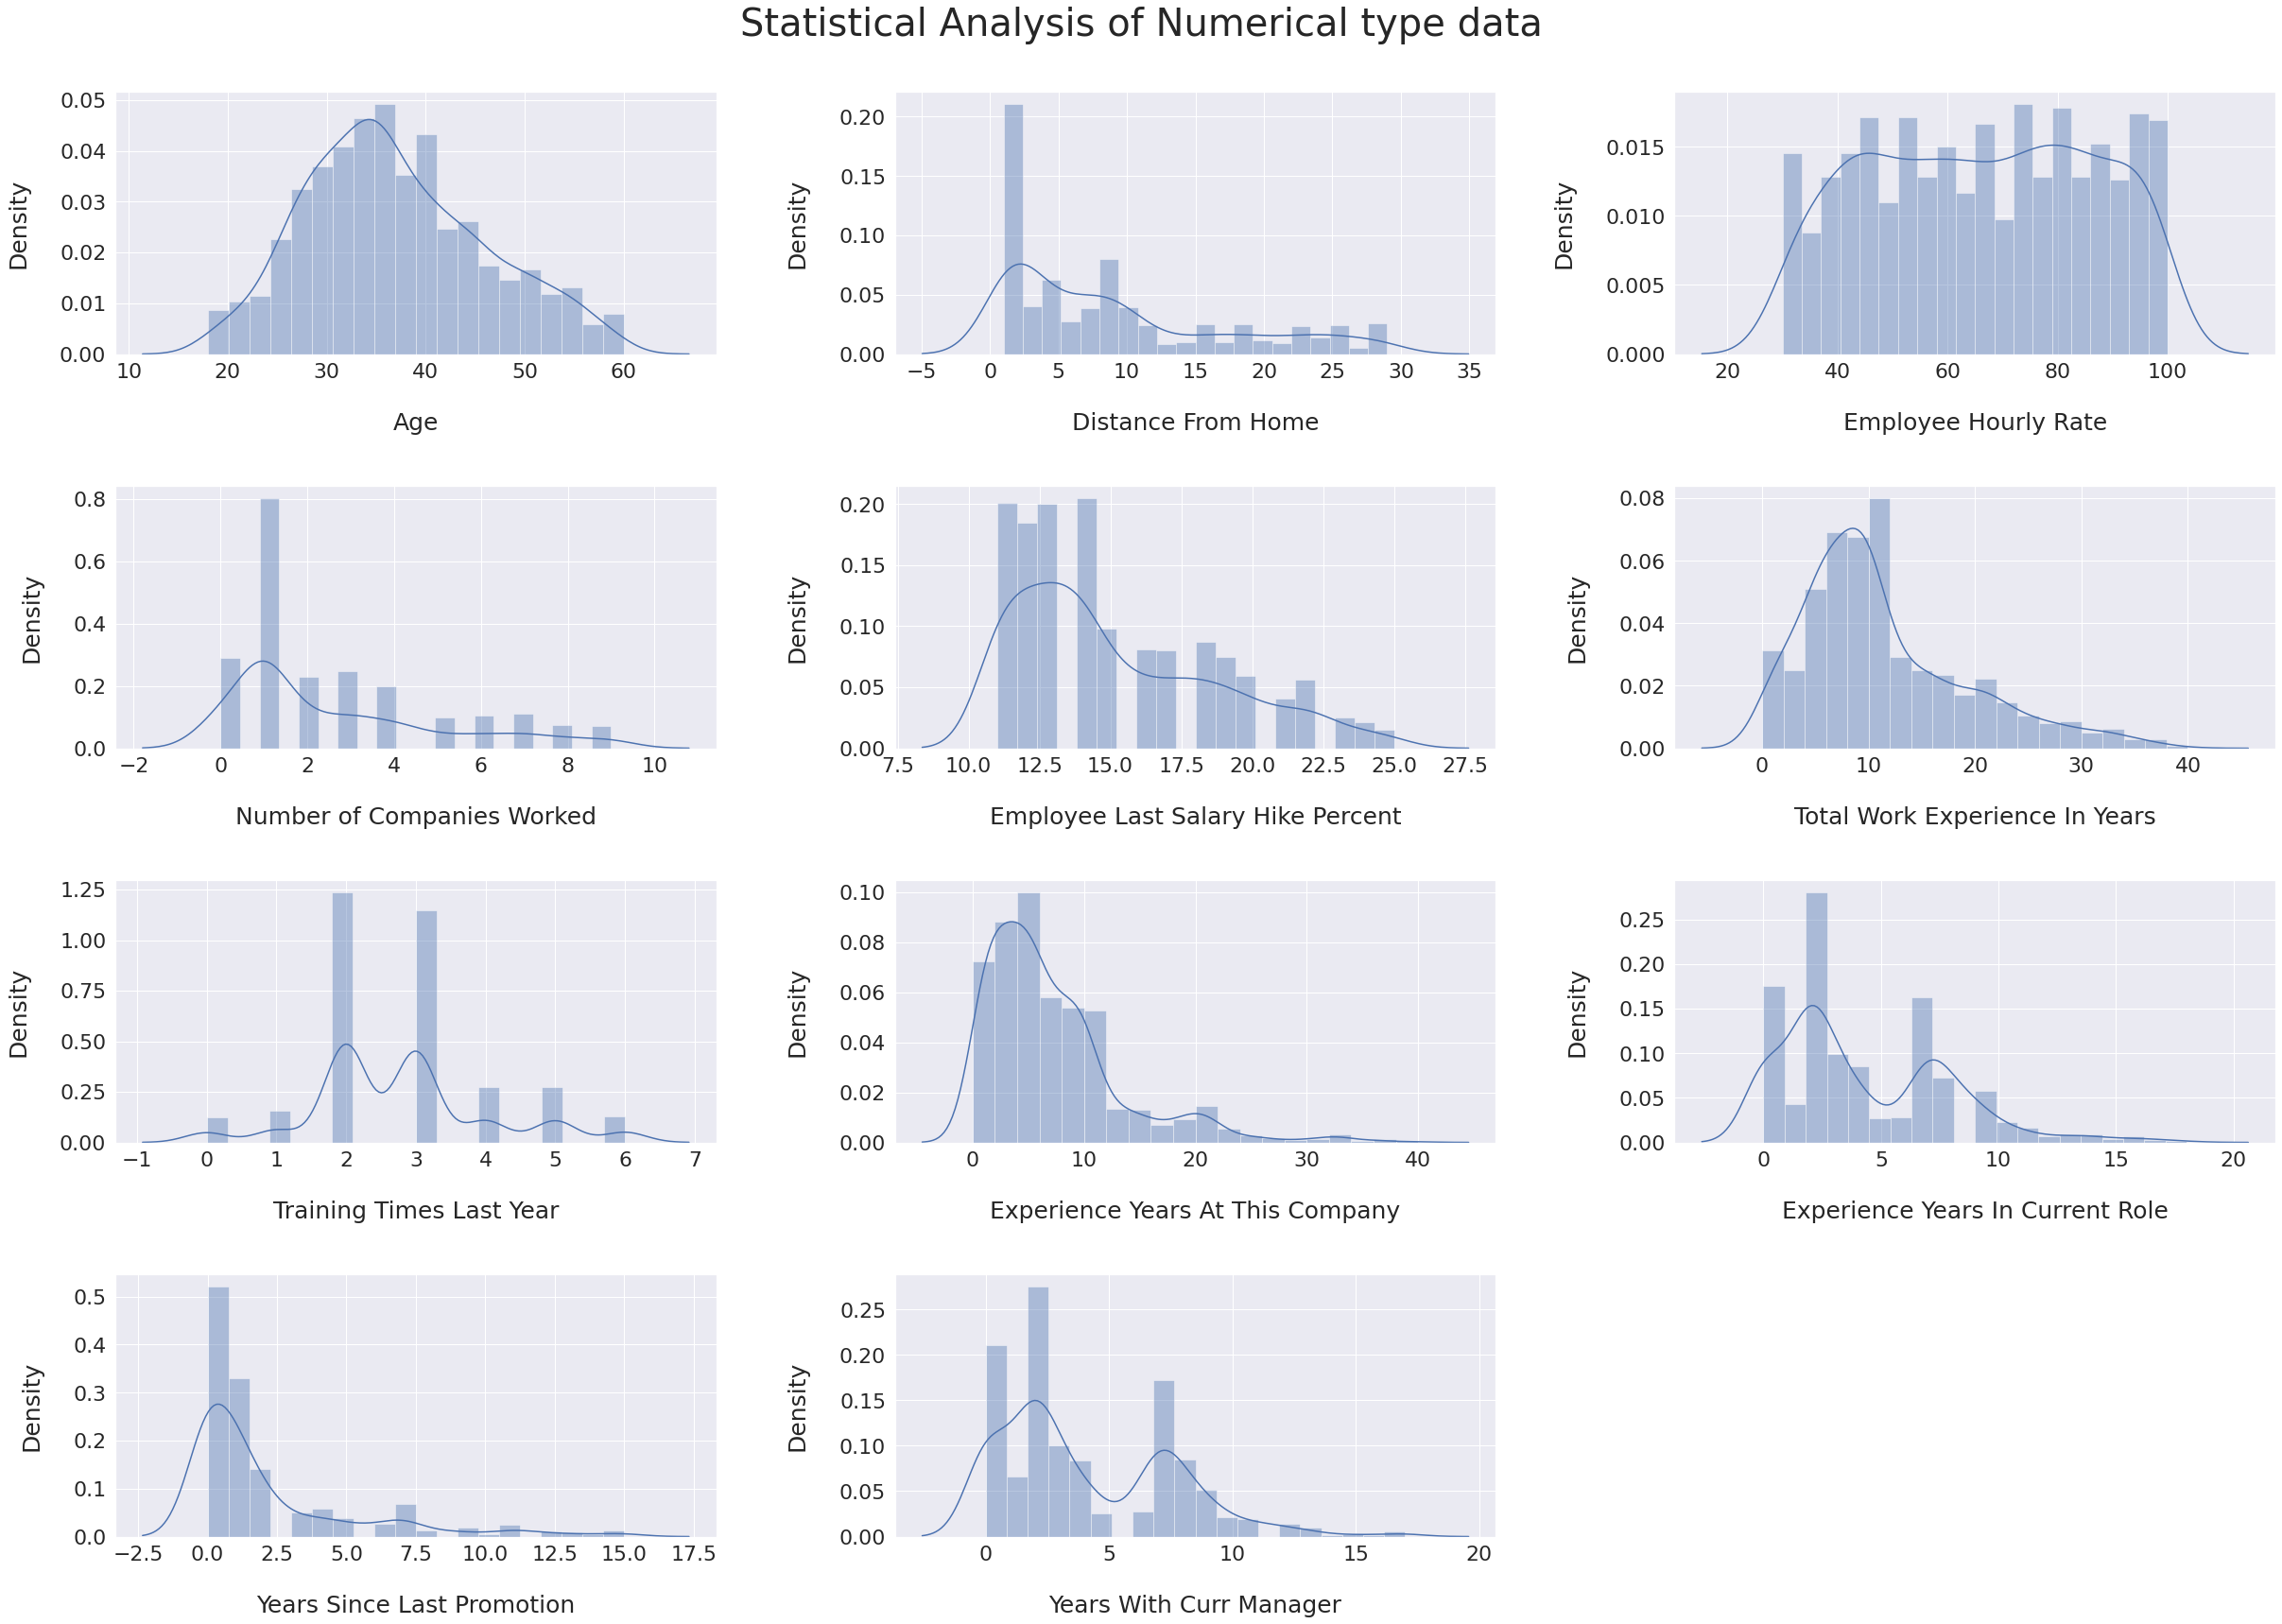

In [24]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":22,"xtick.labelsize":22,"ytick.labelsize":22,
            "legend.fontsize":12})

fig = plt.figure(figsize=(35,25))
fig.suptitle("Statistical Analysis of Numerical type data", fontsize=40)
for index,col in enumerate(num_data):
    plt.subplot(4,3,index+1)
    sns.distplot(num_data.loc[:,col].dropna(),kde=True,bins=20)
    plt.xlabel(f"\n{col}",fontsize=25)
    plt.ylabel("Density\n",fontsize=25)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)

## Defining a function for checking skewness of data

In [28]:
def skewedness(data):
    skewed=[]
    for col in data:
        sk=data[col].skew()
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(f"\033[1mSkewed Column name : {skewedness(num_data)}")
print('\033[1mRange of skewness & kurtosis, S < |1.96|')
# Checking Kurtosis
print('\033[1mSkewness for YearsSinceLastPromotion:',skew(data['Years Since Last Promotion']))
print('\033[1mKurtosis for YearsSinceLastPromotion:',kurtosis(data['Years Since Last Promotion']))

Skewed Column name : ['Years Since Last Promotion']
Range of skewness & kurtosis, S < |1.96|
Skewness for YearsSinceLastPromotion: 1.9724620367914252
Kurtosis for YearsSinceLastPromotion: 3.5193552691799805


## Performing Operation on Skewed Data

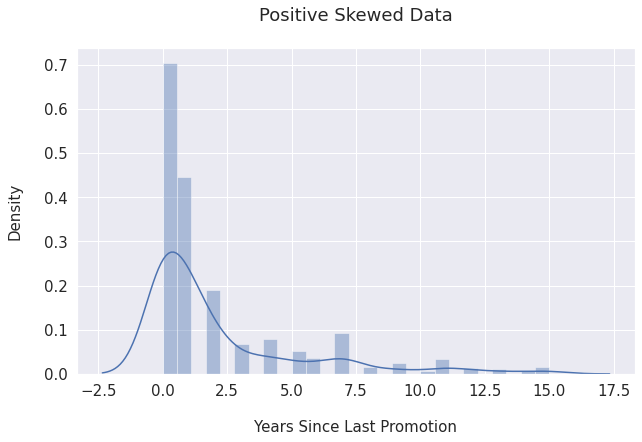

In [29]:
# Dist plot
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
plt.figure(figsize=(10,6))
sns.distplot(num_data['Years Since Last Promotion'])
plt.xlabel("\nYears Since Last Promotion")
plt.ylabel("Density\n")
plt.title("Positive Skewed Data\n",fontsize="18")
plt.show()